In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Predicting Price of House is one of the popular features

In [115]:
# X[0] is 1 always

In [116]:
# We will not use a for loop because it's slow. We will use vectorization


In [117]:
# 1.Data Preparation

In [118]:
from sklearn.datasets import make_regression # To generate some data

In [119]:
X , y = make_regression(n_samples = 500 , n_features = 10,n_informative = 5 , noise = 25.8 , random_state = 42)

In [120]:
n_features = X.shape[1]

In [121]:
print(X.shape , y.shape)

(500, 10) (500,)


In [122]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.222895,-0.918127,1.331339,1.239584,-0.396230,-1.293508,1.920368,0.071254,2.124771,-0.695695
1,-1.106526,-0.024125,1.126565,0.198085,-0.144360,0.059218,-0.268889,2.573360,1.848956,0.013929
2,0.184551,1.208366,2.558199,1.024063,0.592527,2.006093,-0.564248,1.542110,-0.551858,2.061504
3,0.558140,-1.151014,0.463289,0.386323,-0.204471,-0.296607,0.043515,-2.529560,0.414866,0.241322
4,-0.147603,-0.532701,-1.768439,-1.169917,-2.872262,-1.594703,0.323168,-0.466037,0.140886,0.513600


In [123]:
# Step - 2 Normalize the Data
def normalize(X):
    u = X.mean(axis=0)
    std = X.std(axis = 0)

    return (X-u)/std

In [124]:
X = normalize(X)

In [125]:
# Data Visulalisation

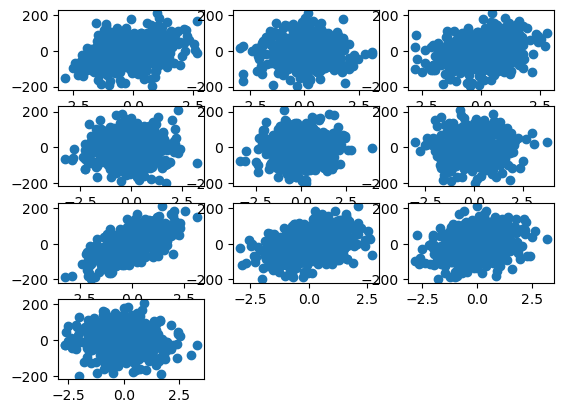

In [126]:
for f in range(0,10):
    plt.subplot(4,3,f+1)
    plt.scatter(X[:,f],y)
plt.show()

In [127]:
# Step 4 : Train Test Split
from sklearn.model_selection import train_test_split

In [128]:
XT,Xt,yT,yt = train_test_split(X,y,test_size = 0.3,shuffle = False,random_state = 0)

In [129]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(350, 10) (350,)
(150, 10) (150,)


In [130]:
def preprocess(X):
    if(X.shape[1]==n_features):
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones,X))
    return X

In [131]:
XT = preprocess(XT)
Xt = preprocess(Xt)

In [132]:
XT.shape
Xt.shape

(150, 11)

In [133]:
# Step 05 Modelling / Linear Regression with Multiple Features

In [134]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [135]:
def loss(X,y,theta):
    yp = hypothesis(X,theta)
    error = np.mean((yp-y)**2)

    return error

In [136]:
def gradient(X,y,theta):
    yp = hypothesis(X,theta)
    grad = np.dot(X.T,(yp-y)) # here we have taken X Transpose because X is of dimension m * n+1 and (yp-y) is of dimension m*1
    m = X.shape[0]
    grad = grad/m
    return grad

In [137]:
def train(X,y,learning_rate = 0.1 , maxItrs = 100):
    n = X.shape[1]
    theta = np.random.randn(n)
    error_list = []
    for i in range(maxItrs):
        theta = theta - learning_rate*gradient(X,y,theta)
        error_list.append(loss(X,y,theta))

    plt.plot(error_list)
    plt.grid()
    return theta
        
    
    

[-3.53758502 27.11858256  1.27579992 20.21363593  1.66752561  2.03510728
 -0.28183921 45.57749563 24.40291933 14.89955697 -0.89816725]


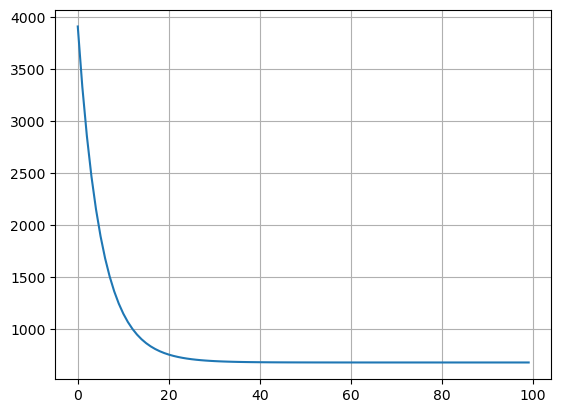

In [138]:
theta = train(XT,yT)
print(theta)

In [139]:
# Model Evaluation

def r2Score(y,yp):
    ymean = y.mean()

    num = np.sum((y-yp)**2)
    den = np.sum((y-ymean)**2)

    return(1-(num/den))

In [140]:
yp = hypothesis(Xt,theta)


In [141]:
r2Score(yt,yp) # more the noise more difficult to fit a hyperplane to the data

0.8996782305095125

In [142]:
# Linear Regression using SK-learn

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
model = LinearRegression()

In [145]:
model.fit(XT,YT)

LinearRegression()

In [146]:
y_predict = model.predict(Xt)

In [147]:
y_predict.shape

(150,)

In [148]:
model.score(Xt,yt)

0.1918794145588658

In [149]:
model.intercept_

-6.858600689755139

In [150]:
model.coef_

array([  0.        ,   8.96463533,   1.9122084 ,  -5.25062658,
         3.33405887, -12.42936885,  -3.60844086,   7.03345778,
         3.17529964,  13.17132031,   4.19162789])